In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from fridge import Fridge
from tes import TES
from QET import QET
from detector import Detector
from PD2 import PD2
from electronics import Electronics
from absorber import Absorber
from simulated_noise import simulate_noise
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from MaterialProperties import TESMaterial

In [66]:
fSnolab = Fridge("SNOLAB", 20e-3, 145e-3, 900e-3, 4.8, 0)
# Absorber: Silicon. Height 1mm. Radius 38.1mm. W safety 3mm. 
absorber = Absorber("Si", "cylinder", 1e-3, 38.1e-3, 3e-3) # same as matlab
eSnolab = Electronics(fSnolab, fSnolab.get_TCP(), fSnolab.get_TMC())
eSLAC = Electronics(fSnolab, fSnolab.get_TMC(), fSnolab.get_TMC(), 5e-3, 6e-3, 25e-9, 25e-9, 4e-12)

tungsten = TESMaterial()

---------------- ABSORBER PARAMETERS ----------------
Absorber SA_face 0.00456036731187748
Absorber SA 0.009360123983958501
------------------------------------------------



In [69]:
# new TES chips
tes_l = 100e-6
tes_w = 400e-6
foverlap = 1.2 # same as matlab (why greater than 1??)
#foverlap = 0.8 # same as matlab (why greater than 1??)
l_overlap = 10e-6 # same as matlab 
n_fin = 6
l_fin = 200e-6 # same as matlab
h_fin = 600e-9 # same as matlab
sigma = tungsten._gPep_v
T_eq = -100
res_n = 300e-3

Resistance of 1 TES:  0.6
---------------- TES PARAMETERS ----------------
wTc 0.0001661186588593978
Tc 0.04
rho 9.599999999999999e-08
t 4e-08
l 0.0001
w 0.0004
n_fin 6
vol1TES 1.6e-15
vol1 1.666432e-15
nTES 2
volFinCon 2.6400000000000004e-17
WAlOverlap 9.600000000000001e-17
veff_WFinCon 0.88
veff_WAloverlap 0.45
Rn 0.3
Ro 0.135
fOp 0.45
Ro 0.135
L 0
------------------------------------------------

---------------- QET PARAMETERS ----------------
ePQP 0.52
lfin 0.0002
hfin 6e-07
loverlap 1e-05
ld 0.0003402
la 0.00029508196721311476 
Afin_empty 1.0500000000000001e-08
Afin 1.5516370614359174e-07
------------------------------------------------

l_cell:  0.04399132621977406
y_cell:  0.0005
x_cell:  0.04399132621977406
w_rail_main  8e-06
w_rail_qet  4e-06
a_passive_qet:  5.258959146372887e-07
tes_passive  1.0517918292745773e-06
SA_passive =  4.789760624251109e-06
fSA qpabsorb:  0.0005448739830026704
Absorber lscat:  0.001948849104859335
---------------- DETECTOR PARAMETERS ---------------

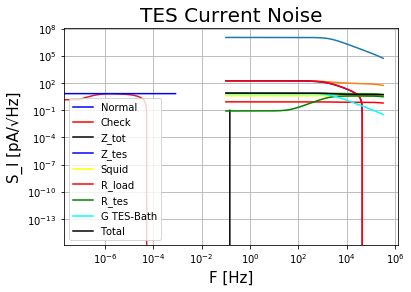

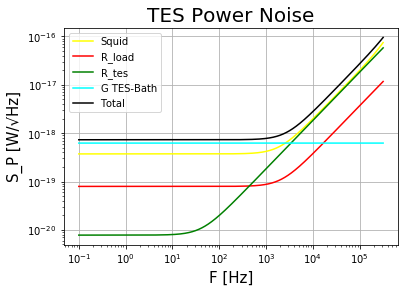

---------------- NOISE PARAMETERS ----------------
--------------------------------------------------

>>>>>>>>>>>>>>>>>>>>>> RESOLUTION IS 16.391223046413717


In [70]:
tes = TES(tes_l, tes_w, foverlap, n_fin, sigma, T_eq, res_n, tungsten )
qet = QET( l_fin, h_fin, l_overlap, tes)
det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1)
res = simulate_noise(det)

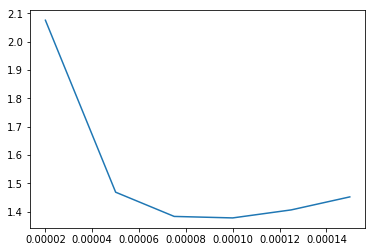

In [60]:
plt.plot(tes_l, eres)
plt.show()